In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from keras.preprocessing import image
import scipy
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import numpy as np

In [3]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/ 255.0, test_images/ 255.0

class_names = ["airplane", "automobile","bird","cat","deer", "dog", "frog","horse",
               "ship","truck"]

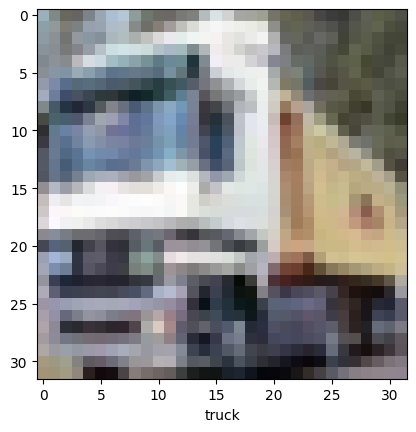

In [4]:
image_index = 1

plt.imshow(train_images[image_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[image_index][0]])
plt.show()

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D followed by a few densely  connected layers. The idea is that the stack of convolutional and max pooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the Convolutional Base

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [7]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5130 - accuracy: 0.4487 - val_loss: 1.2358 - val_accuracy: 0.5611
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1352 - accuracy: 0.5994 - val_loss: 1.0377 - val_accuracy: 0.6310
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9887 - accuracy: 0.6547 - val_loss: 0.9332 - val_accuracy: 0.6699
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8881 - accuracy: 0.6913 - val_loss: 0.8853 - val_accuracy: 0.6921
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8170 - accuracy: 0.7142 - val_loss: 0.8859 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7573 - accuracy: 0.7350 - val_loss: 0.8601 - val_accuracy: 0.7088
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7045 - accuracy: 0.7543 - val_loss: 0.8558 - 

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ",test_acc)

313/313 - 1s - loss: 0.8389 - accuracy: 0.7218 - 1s/epoch - 5ms/step
Test accuracy:  0.7218000292778015


Predictions

In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 5ms/step


The largest number is the image we found it most likely clothing article to be:  [ 1.2352455  3.5274215 -3.4923959 -1.818303  -2.979158  -4.7424064
 -1.1237181 -6.5431533  0.7815669  1.5609138]
The highest:  8
Which is this clothing article:  ship
Image of clothing article: 


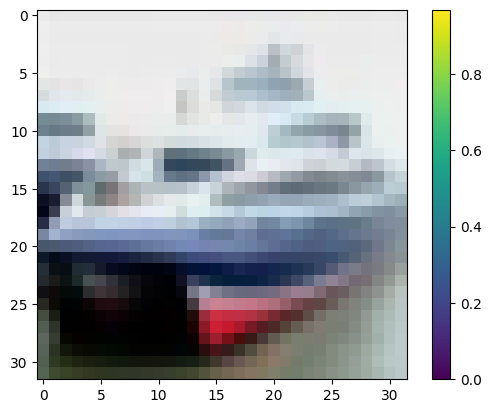

In [14]:
print("The largest number is the image we found it most likely clothing article to be: ",predictions[9])
print("The highest: ",np.argmax(predictions[1]))
print("Which is this clothing article: ",class_names[np.argmax(predictions[1])])
print("Image of clothing article: ")
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In the situation where you don't have millions of images it is dissicult to train a CNN from scratch that performs well. But there are some techniques qw can do to make it better.

To avoid overfitting and create a larger dataset from a smaller on we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalize better. 
The transformations can be things like:
 -  Compressions
 -  Rotations
 -  Stretches
 -  Color changes

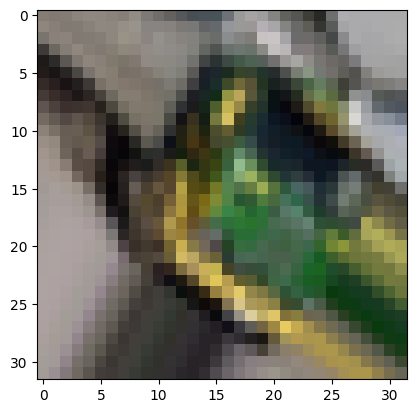

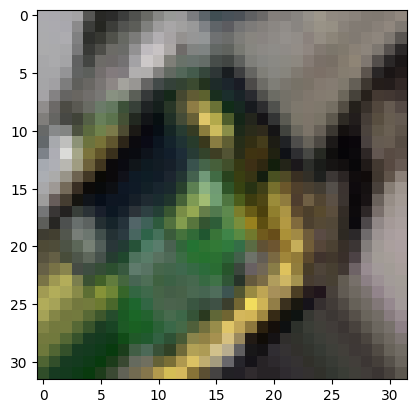

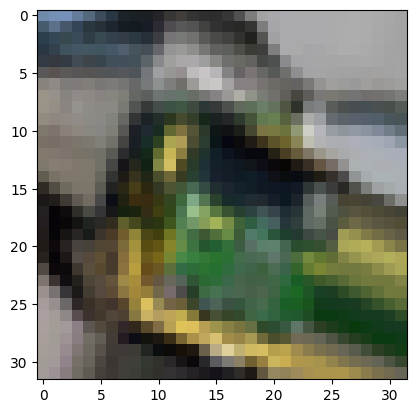

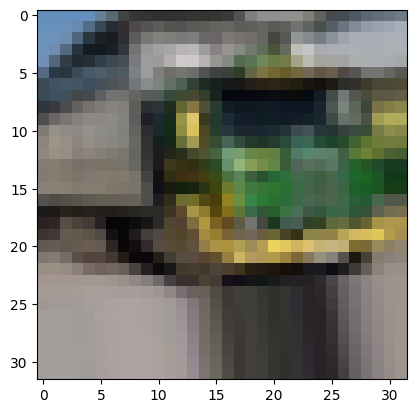

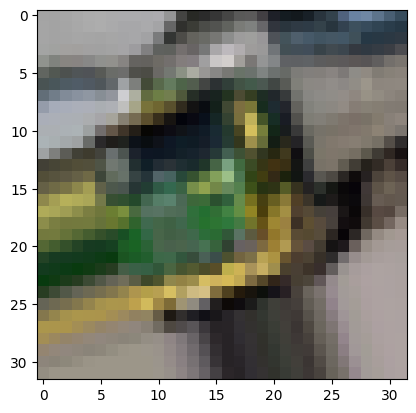

In [17]:
# Creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# pick and image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # convert to numpy array
img = img.reshape((1,) + img.shape) #reshape image

i = 0

for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    plt.imshow(img_to_array(batch[0]))
    i += 1
    if i > 4:
        break

plt.show()


Data augmentation is a great technique is you want to increase the size of your data set, but what if after this we still don't have enough images in our dataset? We can use a pretrained model.

In [18]:
import tensorflow_datasets as tfd

/Users/victorialangoe/Documents/Documents - Victoria’s MacBook Pro/UiO/Master/freeCodeCamp/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We will load the cats_vs_dogs dataset from the module tensorflow_datasets.
This dataset contains (image, label) pairw where images have different dimensions and 3 color channels.

In [19]:
tfd.disable_progress_bar()

# Split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfd.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:90%]","train[90%:]"],
    with_info=True,
    as_supervised=True
)

2023-12-22 12:23:59.754997: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Dataset cats_vs_dogs downloaded and prepared to /Users/victorialangoe/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


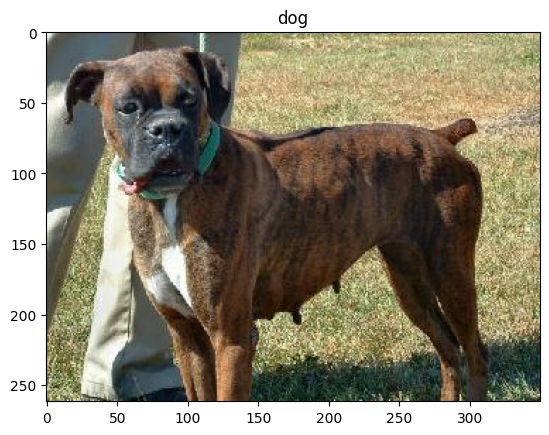

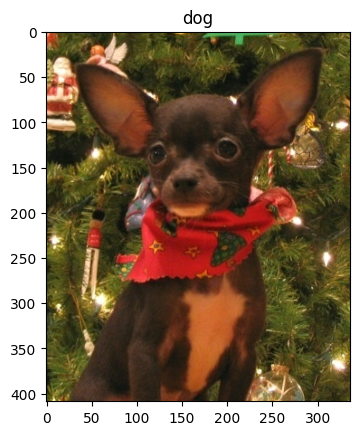

In [20]:
get_label_name = metadata.features["label"].int2str # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

These images are not the same size, so we need to make them the same size

In [24]:
IMG_SIZE = 160 # 160x160

def format_image(image, label):
    """
    Returns an image that reshapes images to the IMG_SIZE
    """

    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [25]:
train = raw_train.map(format_image)
validation = raw_validation.map(format_image)
test = raw_test.map(format_image)

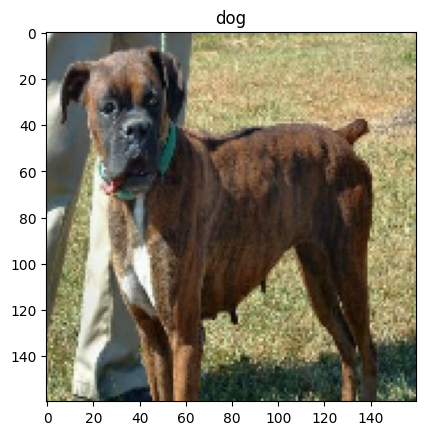

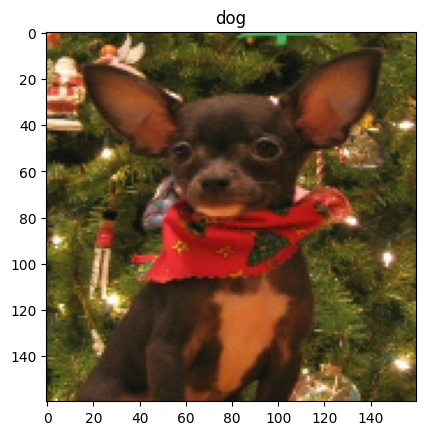

In [27]:
for image, label in train.take(2):
    plt.figure()
    plt.imshow((image.numpy() + 1) / 2)
    plt.title(get_label_name(label))

Picking a Pretrained model
The model we are going to use as the convolutional base for our model is the MobileNet V2 developed by Googl (open source). This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So when we load in the model we'll specify that we do not want to load the top (classification) layer. 

In [28]:
IMP_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(
    input_shape = IMP_SHAPE,
    include_top = False,
    weights ="imagenet"
)

9406464/9406464 [==============================] - 1s 0us/step


In [29]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [31]:
BATCH_SIZE = 32

train_batches = train.shuffle(1000).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)

for image, _ in train_batches.take(1):
    pass

feature_batch = base_model(image)
print(feature_batch.shape)


(32, 5, 5, 1280)


The term refers to disabling the training property of a layer. It simply means we wont make any changes to the weights of any layers that are frozen during training. This is important as we dont want to change the convolutional base that already has learned weights.

In [33]:
base_model.trainable = False

In [34]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

Now that we have our base layer setup we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 are of each 2D feature map and return to us a single 1280 element vector per filter.

In [35]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [36]:
prediction_layer = tf.keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [37]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes. The only thing that needs to be learned is the weights and biases on the two last layers.

In [39]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [42]:
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps= validation_steps) 

20/20 [==============================] - 2s 102ms/step - loss: 0.0646 - accuracy: 0.9797


In [43]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data = validation_batches)

acc = history.history["accuracy"]
print(acc)

Epoch 1/3
582/582 [==============================] - 61s 104ms/step - loss: 0.0643 - accuracy: 0.9770 - val_loss: 0.0601 - val_accuracy: 0.9755
Epoch 2/3
582/582 [==============================] - 62s 105ms/step - loss: 0.0560 - accuracy: 0.9790 - val_loss: 0.0549 - val_accuracy: 0.9781
Epoch 3/3
582/582 [==============================] - 61s 104ms/step - loss: 0.0516 - accuracy: 0.9804 - val_loss: 0.0521 - val_accuracy: 0.9785
[0.9770016074180603, 0.9789897799491882, 0.9803869128227234]


To load save and load the model so that you dont have to train the model again

In [44]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model("dogs_vs_cats.h5")

/Users/victorialangoe/Documents/Documents - Victoria’s MacBook Pro/UiO/Master/freeCodeCamp/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
